In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully")

Libraries loaded successfully


In [ ]:
df = pd.read_csv('Flat prices(mld project).csv')
df 

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
92265,2021-02,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,148.0,Maisonette,1988,66 years 08 months,655000.0
92266,2021-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,66 years 10 months,650000.0
92267,2021-02,YISHUN,EXECUTIVE,364,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,66 years 02 months,607000.0
92268,2021-02,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,66 years,670000.0


This is done to understand the basic statistics (mean, min, max, etc.) and data types of the dataset.
Exploratory Data Analysis (EDA) helps to spot potential data issues early, such as incorrect types, missing values, or anomalies.

In [ ]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,92270.000000,92270.000000,9.227000e+04
mean,97.768362,1994.444175,4.448869e+05
std,24.263575,13.064066,1.548243e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.330000e+05
50%,95.000000,1995.000000,4.150000e+05
75%,113.000000,2003.000000,5.200000e+05
max,249.000000,2019.000000,1.258000e+06


This line generates descriptive statistics for all numerical columns in the DataFrame. It helps give a quick overview of the dataset's distribution and central tendencies. The output includes:

count – number of non-null entries

mean – average value

std – standard deviation (spread of values)

min – minimum value

25% / 50% / 75% – quartile values (Q1, median, Q3)

max – maximum value

This is useful during exploratory data analysis (EDA) to identify:

Potential outliers (very large/small values)

Skewed distributions (mean far from median)

Data entry errors (e.g., extremely high prices)

Scaling needs (e.g., if values differ by orders of magnitude)

In [ ]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

This line displays the data type (dtype) of each column in the DataFrame. It helps verify whether each feature is stored in the correct format. Typical types include:

int64: integer values (e.g., years, counts)

float64: decimal numbers (e.g., prices, ratios)

object: text or mixed data (e.g., flat types, town names)

datetime64: date/time information (e.g., transaction dates)

category: efficient storage for repeated text values (e.g., flat_type, storey_range)

Why it's useful:
Ensures columns are in the correct format before analysis or modeling

Detects data that may need to be converted (e.g., strings to datetime)

Helps with memory optimization (e.g., using category for repetitive text)

Essential when filtering, grouping, or plotting (wrong types can cause errors)

In [ ]:
df.duplicated()
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 220


This code checks for duplicate rows in the DataFrame and prints the total number found. Identifying duplicates is important because they can skew the model’s learning process and evaluation metrics, such as the R² score, potentially lowering accuracy if not handled properly.



In [ ]:
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


This code removes duplicate rows from the dataset to improve data quality and model performance. Duplicate data can bias the model by over-representing certain samples, leading to overly optimistic or misleading metrics. In my case, after removing duplicates, the model’s R² value improved (e.g., increased from 0.8821), indicating better generalization and a more reliable fit.

In [ ]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
92265,2021-02,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,148.0,Maisonette,1988,66 years 08 months,655000.0
92266,2021-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,66 years 10 months,650000.0
92267,2021-02,YISHUN,EXECUTIVE,364,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,66 years 02 months,607000.0
92268,2021-02,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,66 years,670000.0


In [ ]:
# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Extract year and month number as numeric features
df['year'] = df['month'].dt.year
df['month_num'] = df['month'].dt.month

# Drop original 'month' column
df = df.drop(columns=['month'])

This code converts the ‘month’ column from a string to a datetime object for easier date manipulation. It then extracts the year and month as separate numeric features (year and month_num), which are more suitable for modeling. Finally, the original ‘month’ column is dropped since its information has been split into these two new columns.

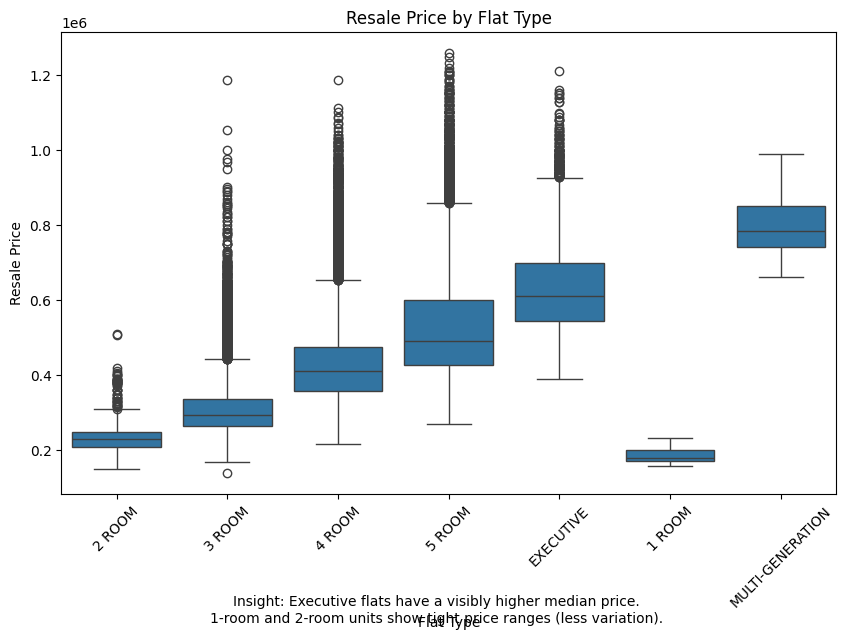

In [ ]:
# Before doing get_dummies, create a backup copy for visualization
df_for_viz = df.copy()

# Create the boxplot from the backup
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='flat_type', y='resale_price')
plt.title("Resale Price by Flat Type")
plt.xlabel("Flat Type")
plt.ylabel("Resale Price")
plt.xticks(rotation=45)
plt.figtext(0.5, -0.1,
            "Insight: Executive flats have a visibly higher median price.\n"
            "1-room and 2-room units show tight price ranges (less variation).",
            wrap=True, horizontalalignment='center')
plt.show()



Before applying one-hot encoding, a backup copy of the DataFrame (df_for_viz) is created to preserve the original categorical data for visualization purposes. Using this backup, a boxplot is generated to visualize the distribution of resale prices across different flat types. This plot helps identify differences in price ranges and medians for each flat type, revealing that Executive flats generally have higher median prices, while 1-room and 2-room flats show less variation and tighter price ranges. Such visual insights guide feature understanding and model interpretation.

GRIDSEARCHCV

When applying GridSearchCV to tune hyperparameters, I observed that the accuracy (or R²) value decreased instead of improving compared to the baseline model.

Possible reasons for this unexpected result:
Overfitting to validation folds: The hyperparameter grid may have caused the model to overfit on the specific folds used in cross-validation, leading to worse generalization on unseen data.

Inadequate hyperparameter search space: The chosen ranges or parameters might not include better-performing values, causing the search to settle on suboptimal settings.

Data characteristics: The dataset’s complexity or noise level may limit the benefits from hyperparameter tuning.

Evaluation metric mismatch: The scoring metric used in GridSearchCV may not align perfectly with your final model evaluation metric or business goals.

What I learned:
Hyperparameter tuning is not guaranteed to always improve performance and requires careful setup.

It’s important to validate tuned models on an independent test set to confirm true improvements.

Further tuning with refined parameters or alternative methods (like randomized search or Bayesian optimization) may be needed.

Before use of GridsearchCV, R2 value 0.8826
After use of girdsearchCV, R2 value 0.8822

In [ ]:
df = df.drop(columns=['flat_model', 'lease_commence_date', 'remaining_lease','block', 'street_name'])

df = pd.get_dummies(df, columns=['town', 'flat_type', 'storey_range'])


These lines perform feature selection and encoding:

The first line drops columns like 'flat_model', 'lease_commence_date', 'remaining_lease', 'block', and 'street_name' which may be irrelevant or redundant for the model, helping reduce noise and dimensionality.

The second line applies one-hot encoding (pd.get_dummies) to categorical columns 'town', 'flat_type', and 'storey_range', converting them into binary indicator variables suitable for machine learning algorithms that require numerical input.

This preprocessing step is essential for preparing the dataset for modeling.

In [ ]:
X = df.drop('resale_price', axis=1)
Y = df['resale_price']
df

,floor_area_sqm,resale_price,year,month_num,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,44.0,232000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,250000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,262000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,68.0,265000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,67.0,265000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92265,148.0,655000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92266,146.0,650000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92267,146.0,607000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92268,142.0,670000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Separating features (X) and target (Y) is essential for supervised learning. resale_price is what we're trying to predict.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)   

This line splits the dataset into training and testing sets using scikit-learn’s train_test_split function. Here, 30% of the data is reserved for testing (test_size=0.3), while 70% is used for training the model. The random_state=42 ensures the split is reproducible, meaning the same split will occur every time this code runs, which is important for consistent evaluation.

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

Cl = ColumnTransformer
Pl = Pipeline
Lr = LinearRegression
RidgeRegressor = Ridge
LassoRegressor = Lasso
DecisionTreeRegressor = DecisionTreeRegressor
RandomForestRegressor = RandomForestRegressor
GradientBoostingRegressor = GradientBoostingRegressor
KNR = KNeighborsRegressor
SVC = SVC
Lor = LogisticRegression


This block imports several scikit-learn classes essential for building machine learning pipelines, including transformers (ColumnTransformer) and pipelines (Pipeline). It also imports various regression and classification models such as Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, K-Nearest Neighbors, Support Vector Classifier (SVC), and Logistic Regression. For convenience and code readability, the imported classes are aliased with shorter variable names. These aliases can simplify later references when constructing pipelines or models.

In [ ]:
df.nunique()

floor_area_sqm                 162
resale_price                  2634
year                             5
month_num                       12
town_ANG MO KIO                  2
town_BEDOK                       2
town_BISHAN                      2
town_BUKIT BATOK                 2
town_BUKIT MERAH                 2
town_BUKIT PANJANG               2
town_BUKIT TIMAH                 2
town_CENTRAL AREA                2
town_CHOA CHU KANG               2
town_CLEMENTI                    2
town_GEYLANG                     2
town_HOUGANG                     2
town_JURONG EAST                 2
town_JURONG WEST                 2
town_KALLANG/WHAMPOA             2
town_MARINE PARADE               2
town_PASIR RIS                   2
town_PUNGGOL                     2
town_QUEENSTOWN                  2
town_SEMBAWANG                   2
town_SENGKANG                    2
town_SERANGOON                   2
town_TAMPINES                    2
town_TOA PAYOH                   2
town_WOODLANDS      

In [ ]:
df.dtypes

floor_area_sqm                float64
resale_price                  float64
year                            int32
month_num                       int32
town_ANG MO KIO                  bool
town_BEDOK                       bool
town_BISHAN                      bool
town_BUKIT BATOK                 bool
town_BUKIT MERAH                 bool
town_BUKIT PANJANG               bool
town_BUKIT TIMAH                 bool
town_CENTRAL AREA                bool
town_CHOA CHU KANG               bool
town_CLEMENTI                    bool
town_GEYLANG                     bool
town_HOUGANG                     bool
town_JURONG EAST                 bool
town_JURONG WEST                 bool
town_KALLANG/WHAMPOA             bool
town_MARINE PARADE               bool
town_PASIR RIS                   bool
town_PUNGGOL                     bool
town_QUEENSTOWN                  bool
town_SEMBAWANG                   bool
town_SENGKANG                    bool
town_SERANGOON                   bool
town_TAMPINE

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define regressors
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),  
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

print("\regression Results:")
model_names = []
r2_scores = []

# Evaluate regressors
print("\nRegression Results:")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    model_names.append(name)
    r2_scores.append(r2)
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.4f}")
# Visualize the results

egression Results:

Regression Results:
LinearRegression: RMSE = 76620.47, MAE = 58317.27, R² = 0.7507
Ridge: RMSE = 76617.25, MAE = 58319.32, R² = 0.7507


c:\Users\Ethan Gwee E-Rui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.796e+13, tolerance: 1.560e+11
  model = cd_fast.enet_coordinate_descent(


Lasso: RMSE = 76618.46, MAE = 58316.98, R² = 0.7507
DecisionTreeRegressor: RMSE = 65404.24, MAE = 42470.43, R² = 0.8183
RandomForestRegressor: RMSE = 52600.08, MAE = 35351.90, R² = 0.8825
GradientBoostingRegressor: RMSE = 72451.34, MAE = 52945.23, R² = 0.7771
KNeighborsRegressor: RMSE = 78667.23, MAE = 51658.48, R² = 0.7372


This code evaluates and compares multiple regression models on the dataset. It imports various regressors such as Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, and K-Nearest Neighbors. For each model, it fits the training data, makes predictions on the test set, and calculates key performance metrics: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²). These metrics provide insight into prediction accuracy (RMSE and MAE measure average error magnitude, while R² indicates the proportion of variance explained by the model). The results are printed and stored for later visualization to identify the best-performing model.

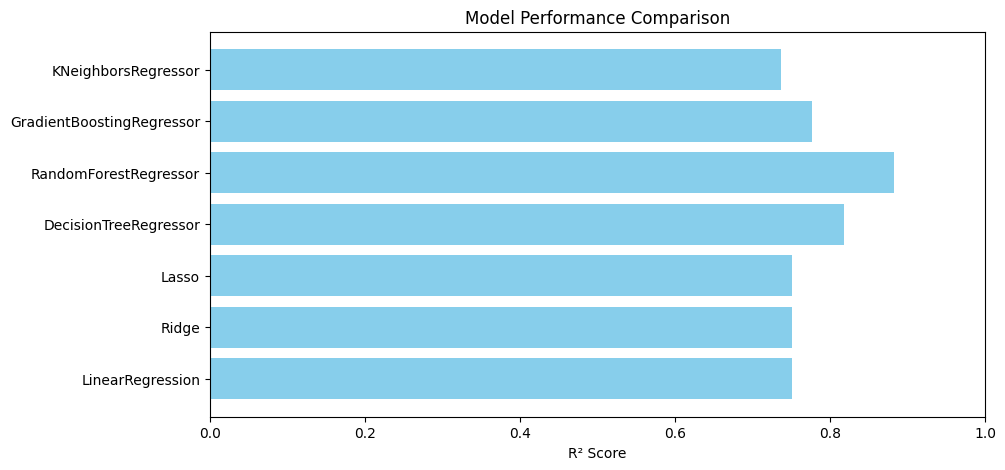

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel('R² Score')
plt.title('Model Performance Comparison')
plt.xlim(0, 1)  # To keep x-axis standard for R² (0 to 1)
plt.show()


This code creates a horizontal bar chart comparing the R² scores of different models. It uses matplotlib to plot the model names on the y-axis and their corresponding R² scores on the x-axis, with bars colored in sky blue. The x-axis is limited from 0 to 1 to reflect the valid range of R² scores, allowing easy visual comparison of each model's predictive performance. The chart includes axis labels and a title for clarity.

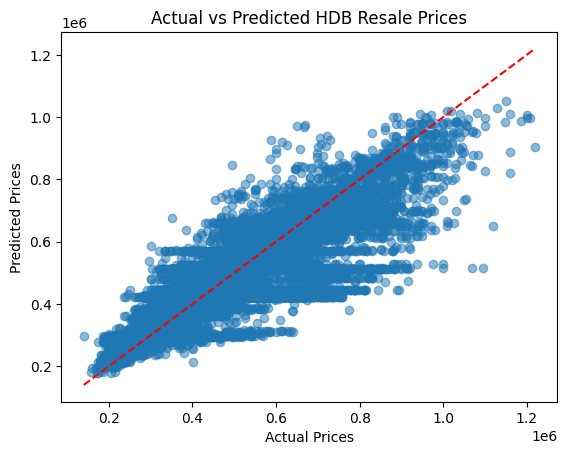

In [ ]:
best_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted HDB Resale Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()


This code trains a RandomForestRegressor with 200 trees and a maximum depth of 10 to predict HDB resale prices, using the training data for fitting and the test data for evaluation. It then plots actual prices against predicted prices in a scatter plot, where points close to the red dashed line indicate accurate predictions. This visualization helps assess the model’s performance by showing how closely predictions match actual values and highlighting any systematic errors or outliers.

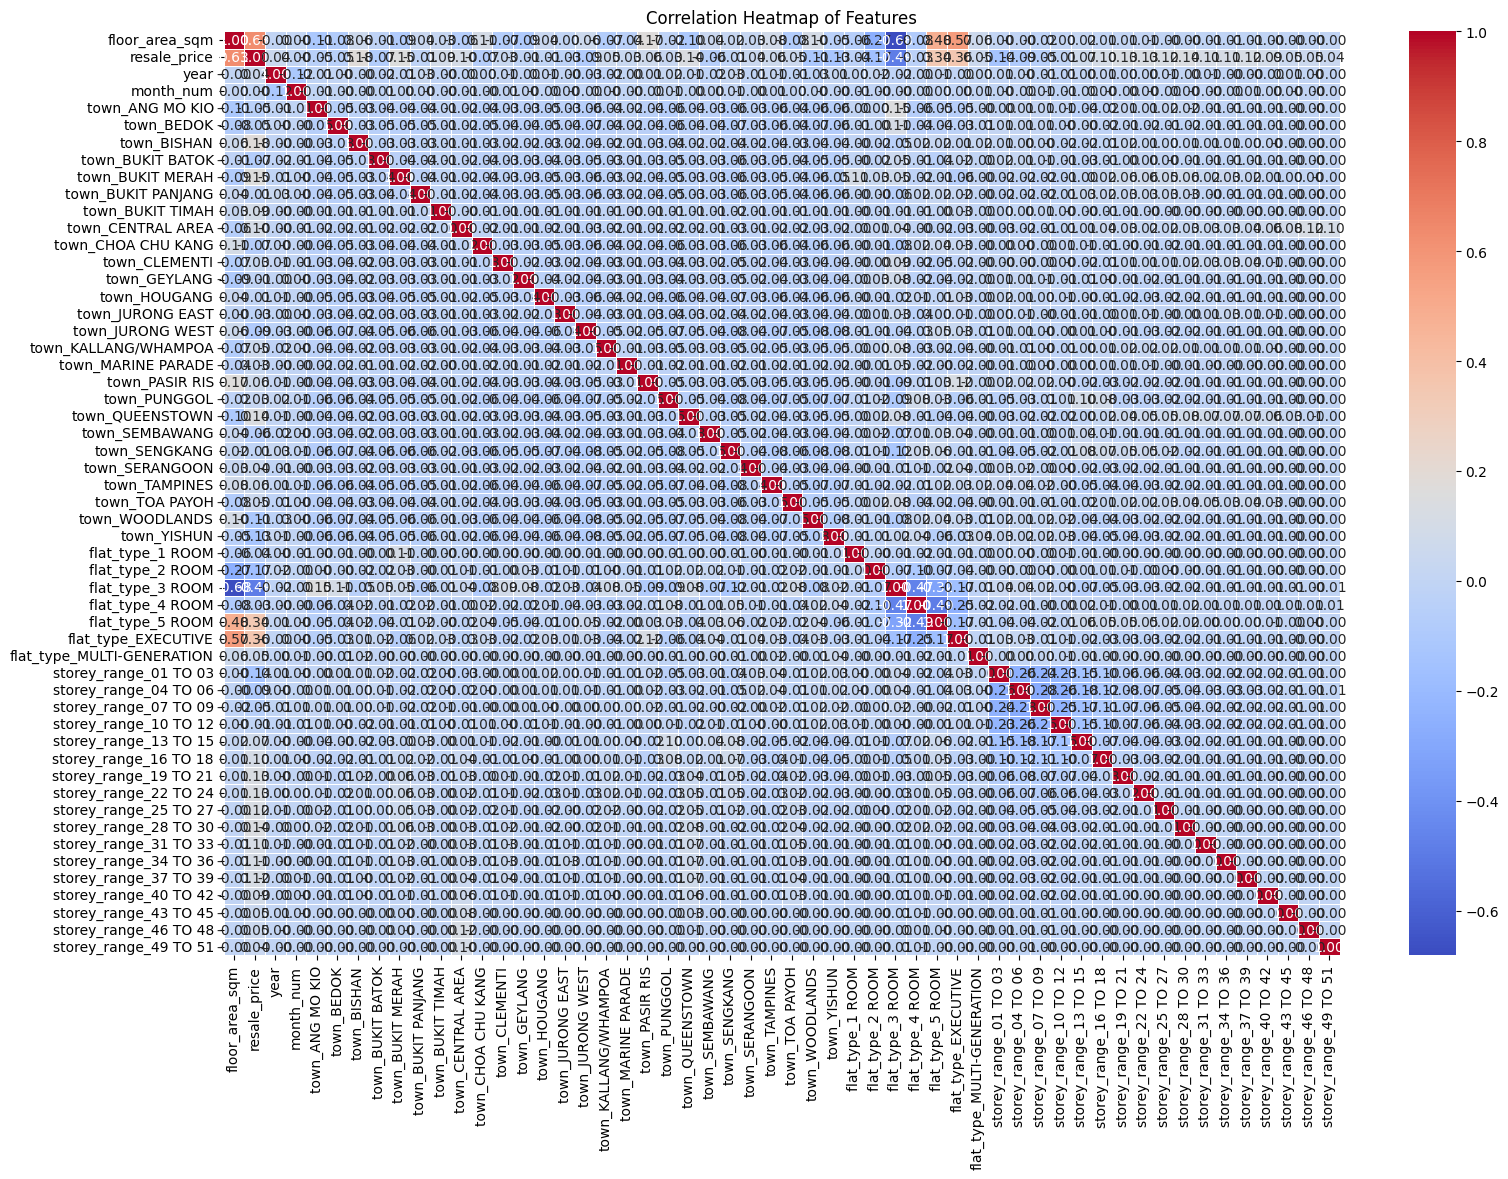

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


This code computes the correlation matrix for all numerical features in the DataFrame to quantify the linear relationships between variables. It then visualizes these correlations using a heatmap with annotations showing the correlation coefficients formatted to two decimal places. The color gradient highlights the strength and direction of relationships, helping identify which features are positively or negatively correlated, which is valuable for feature selection, multicollinearity detection, and understanding data patterns before modeling.

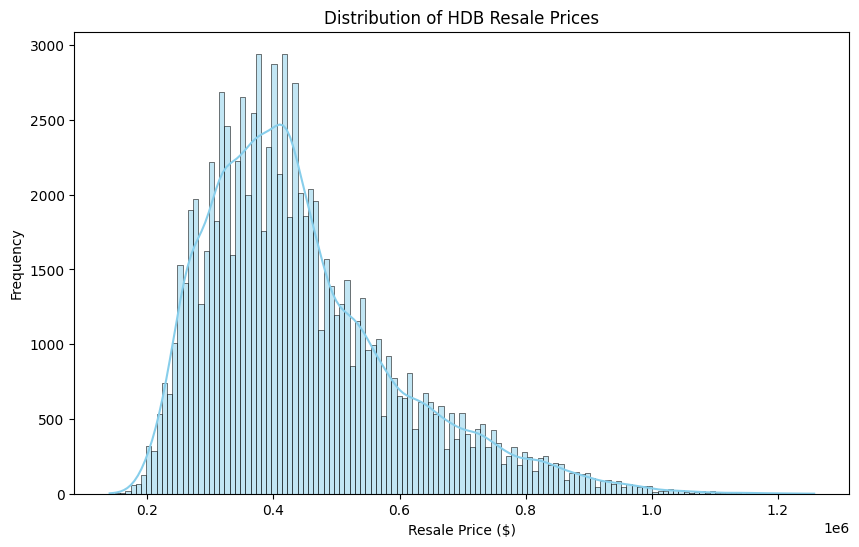

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], kde=True, color='skyblue')
plt.title('Distribution of HDB Resale Prices')
plt.xlabel('Resale Price ($)')
plt.ylabel('Frequency')
plt.show()


This code generates a histogram of the HDB resale prices with an overlaid kernel density estimate (KDE) to visualize the distribution and smooth density curve of prices. The plot helps identify the overall shape of the price distribution, such as skewness, presence of multiple modes, or outliers, which informs data preprocessing decisions and model assumptions.

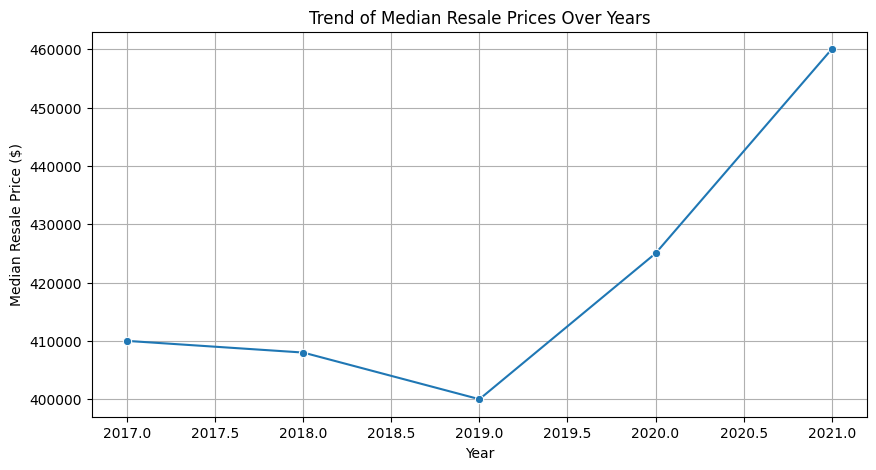

In [ ]:
# If needed: recreate df with year and resale_price
yearly_trend = df.groupby('year')['resale_price'].median().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x='year', y='resale_price', marker='o')
plt.title('Trend of Median Resale Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Median Resale Price ($)')
plt.grid(True)
plt.show()



This code calculates the median resale price for each year by grouping the data accordingly, then plots a line chart to visualize the trend of median HDB resale prices over time. The plot highlights how prices have changed year by year, revealing patterns such as steady increases, dips, or periods of stability, which can guide understanding of market dynamics and inform predictive modeling.

In [ ]:
df

,floor_area_sqm,resale_price,year,month_num,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,44.0,232000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,250000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,262000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,68.0,265000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,67.0,265000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92265,148.0,655000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92266,146.0,650000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92267,146.0,607000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92268,142.0,670000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(list(X_train.columns))


['floor_area_sqm', 'year', 'month_num', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION', 'storey_range_01 TO 03', 'storey_range_04 TO 06', 'storey_range_07 TO 09', 'storey_range_10 TO 12', 'storey_range_13 TO 15', 'storey_range_16 TO 18', 'storey_range_19 TO 21', 'storey_range_22 TO 24', 'storey_range_25 TO 27', 'storey_range_28 TO 30', 'storey_range_31 TO 33', 'storey_range_34 TO 36', 'storey_range_37 TO 39', 

This line prints out a list of the column names from the training feature set X_train. It helps you verify which features are being used in the model, ensuring the data is properly prepared and all expected variables are included before training or evaluation.

In [ ]:
import pandas as pd

input_dict = {
    'floor_area_sqm': [89.0],
    'year': [2021],
    'month_num': [1],
    'town_ANG MO KIO': [0],
    'town_BEDOK': [1],
    'town_BISHAN': [0],

    'town_BUKIT BATOK': [0],
    'town_BUKIT MERAH': [0],
    'town_BUKIT PANJANG': [0],
    'town_BUKIT TIMAH': [0],
    'town_CENTRAL AREA': [0],
    'town_CHOA CHU KANG': [0],
    'town_CLEMENTI': [0],
    'town_GEYLANG': [0],
    'town_HOUGANG': [0],
    'town_JURONG EAST': [0],
    'town_JURONG WEST': [0],
    'town_KALLANG/WHAMPOA': [0],
    'town_MARINE PARADE': [0],
    'town_PASIR RIS': [0],
    'town_PUNGGOL': [0],
    'town_QUEENSTOWN': [0],
    'town_SEMBAWANG': [0],
    'town_SENGKANG': [0],
    'town_SERANGOON': [0],
    'town_TAMPINES': [0],
    'town_TOA PAYOH': [0],
    'town_WOODLANDS': [0],
    'town_YISHUN': [0],
    'flat_type_1 ROOM': [0],
    'flat_type_2 ROOM': [0],
    'flat_type_3 ROOM': [0],
    'flat_type_4 ROOM': [1],
    'flat_type_5 ROOM': [0],
    'flat_type_EXECUTIVE': [0],
    'flat_type_MULTI-GENERATION': [0],
    'storey_range_01 TO 03': [0],
    'storey_range_04 TO 06': [1],
    'storey_range_07 TO 09': [0],
    'storey_range_10 TO 12': [0],
    'storey_range_13 TO 15': [0],
    'storey_range_16 TO 18': [0],
    'storey_range_19 TO 21': [0],
    'storey_range_22 TO 24': [0],
    'storey_range_25 TO 27': [0],
    'storey_range_28 TO 30': [0],
    'storey_range_31 TO 33': [0],
    'storey_range_34 TO 36': [0],
    'storey_range_37 TO 39': [0],
    'storey_range_40 TO 42': [0],
    'storey_range_43 TO 45': [0],
    'storey_range_46 TO 48': [0],
    'storey_range_49 TO 51': [0],
}

predicted_df = pd.DataFrame(input_dict)

predicted_price = model.predict(predicted_df)[0]
print(f"Predicted resale price: ${predicted_price:,.2f}")


Predicted resale price: $516,388.60


This code snippet creates a single-row DataFrame predicted_df with all the required features already one-hot encoded and numerical columns filled in to represent a specific HDB flat (e.g., 89 sqm, year 2021, January, in BEDOK, 4-room flat, storey range 04 TO 06). It then uses your trained model to predict the resale price for this configuration and prints the result formatted as a currency value.

In [ ]:
import joblib

joblib.dump(model, "resale_model.pkl")




['resale_model.pkl']

to run the py code use python -m streamlit run proj.py
